In [9]:
from lib_sections import dict_to_graph
from lib_model import LibModel
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
df = pd.read_csv('data/20230413_clb_taps.csv')
# df['Datetime'] = pd.to_datetime(df['Datetime'])
# entry_df = df.set_index('Datetime')
# entry_df = entry_df[entry_df['Direction']=='Entry']['Direction'].resample('10min',  label='left').count().reset_index()
# entry_df.columns = ['timestamp', 'entry_counts']
# entry_df

In [11]:
import json
# Opening JSON file
lib_sections_file = open('static/lib_sections.json')
lib_sections = json.load(lib_sections_file)
sections_attrs_file = open('static/sections_attrs.json')
sections_attrs = json.load(sections_attrs_file)
connections_file = open('static/connections.json')
connections = json.load(connections_file)

In [12]:
lib_graph = dict_to_graph(lib_sections, sections_attrs, connections)
lib_graph

In [13]:
model = LibModel(df, lib_graph)
model.run()
results = model.datacollector.get_model_vars_dataframe()
# results['timestamp'] = entry_df['timestamp']
# sns.lineplot(results, x='timestamp', y='num_agents')

<AxesSubplot: >

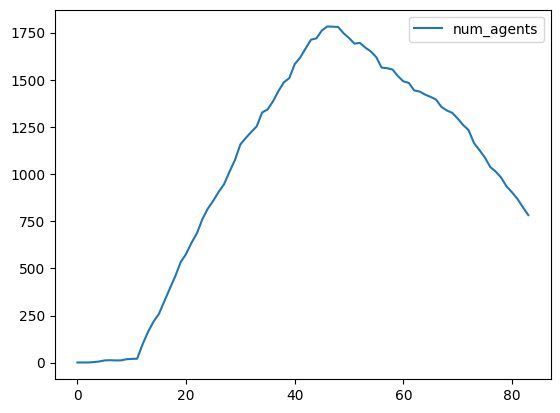

In [14]:
sns.lineplot(results)

In [15]:
results2 = model.datacollector.get_table_dataframe("SectionsData")
results2['utilization_rate'] = 1-results2['empty_seats']/results2['capacity']
results2

,timestamp,section,level,seat_type,capacity,empty_seats,utilization_rate
0,2023-04-12 22:50:00+00:00,clb_3-movable_seat,clb_3,movable_seat,500.0,500.0,0.000
1,2023-04-12 22:50:00+00:00,clb_3-4_man_seat,clb_3,4_man_seat,200.0,200.0,0.000
2,2023-04-12 22:50:00+00:00,clb_3-8_man_seat,clb_3,8_man_seat,800.0,800.0,0.000
3,2023-04-12 22:50:00+00:00,clb_3-window_seat,clb_3,window_seat,100.0,100.0,0.000
4,2023-04-12 22:50:00+00:00,clb_3-sofa,clb_3,sofa,100.0,100.0,0.000
...,...,...,...,...,...,...,...
3775,2023-04-13 12:40:00+00:00,wbs_6-sofa,wbs_6,sofa,100.0,95.0,0.050
3776,2023-04-13 12:40:00+00:00,wbs_6-soft_seat,wbs_6,soft_seat,400.0,356.0,0.110
3777,2023-04-13 12:40:00+00:00,wbs_6-cubicle,wbs_6,cubicle,40.0,29.0,0.275
3778,2023-04-13 12:40:00+00:00,wbs_6-d_cubicle,wbs_6,d_cubicle,80.0,68.0,0.150


In [16]:
results2['section'].unique()

array(['clb_3-movable_seat', 'clb_3-4_man_seat', 'clb_3-8_man_seat',
       'clb_3-window_seat', 'clb_3-sofa', 'clb_3-soft_seat',
       'clb_3-cubicle', 'clb_3-d_cubicle', 'clb_3-diagonal_seat',
       'clb_4-movable_seat', 'clb_4-4_man_seat', 'clb_4-8_man_seat',
       'clb_4-window_seat', 'clb_4-sofa', 'clb_4-soft_seat',
       'clb_4-cubicle', 'clb_4-d_cubicle', 'clb_4-diagonal_seat',
       'clb_5-movable_seat', 'clb_5-4_man_seat', 'clb_5-8_man_seat',
       'clb_5-window_seat', 'clb_5-sofa', 'clb_5-soft_seat',
       'clb_5-cubicle', 'clb_5-d_cubicle', 'clb_5-diagonal_seat',
       'clb_6-movable_seat', 'clb_6-4_man_seat', 'clb_6-8_man_seat',
       'clb_6-window_seat', 'clb_6-sofa', 'clb_6-soft_seat',
       'clb_6-cubicle', 'clb_6-d_cubicle', 'clb_6-diagonal_seat',
       'wbs_6-movable_seat', 'wbs_6-4_man_seat', 'wbs_6-8_man_seat',
       'wbs_6-window_seat', 'wbs_6-sofa', 'wbs_6-soft_seat',
       'wbs_6-cubicle', 'wbs_6-d_cubicle', 'wbs_6-diagonal_seat'],
      dtype=object)

<AxesSubplot: xlabel='timestamp', ylabel='utilization_rate'>

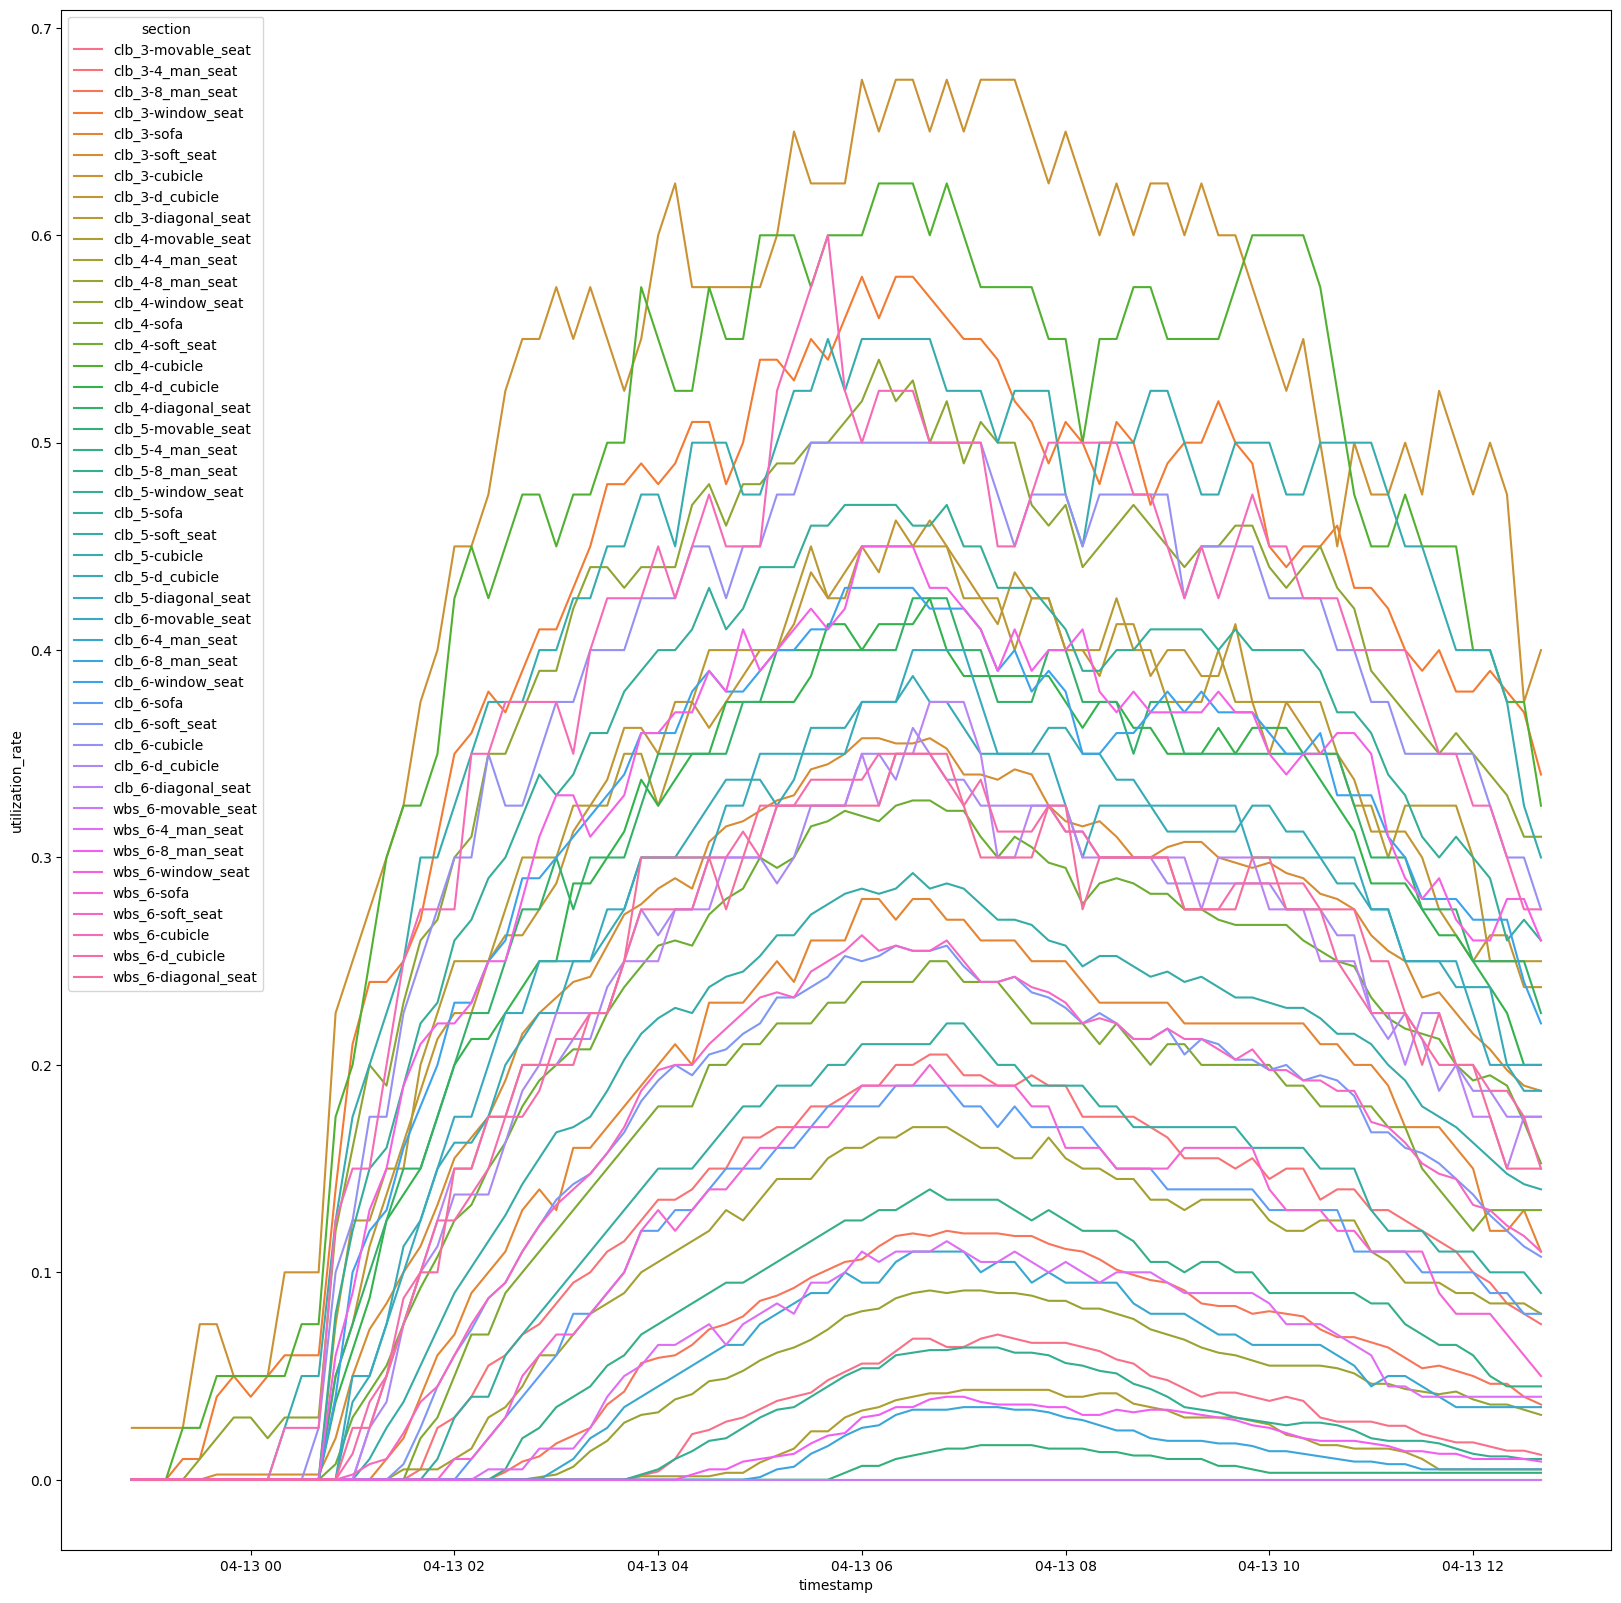

In [17]:
plt.figure(figsize=(20,20))
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='section')

<AxesSubplot: xlabel='timestamp', ylabel='utilization_rate'>

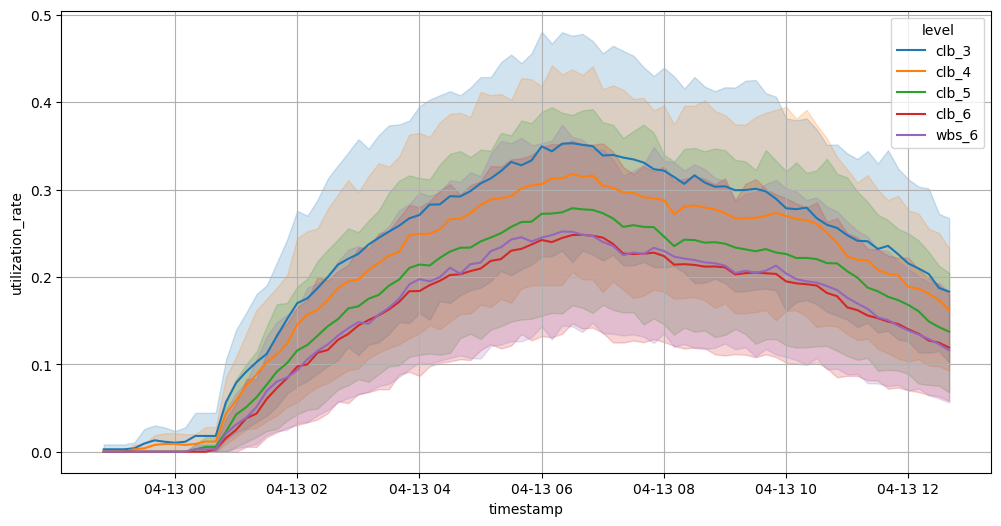

In [18]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='level')

<AxesSubplot: xlabel='timestamp', ylabel='utilization_rate'>

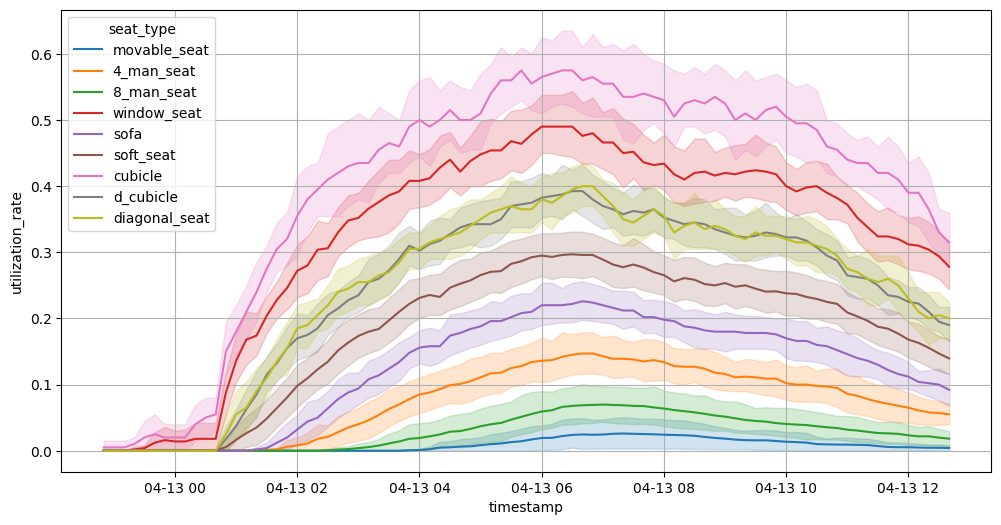

In [19]:
plt.figure(figsize=(12,6))
plt.grid(True)
sns.lineplot(results2, x='timestamp', y='utilization_rate', hue='seat_type')

In [20]:
agents = model.datacollector.get_agent_vars_dataframe()
agents

chosen_seat  satisfaction
Step AgentID                                   
0    0-0            clb_3-cubicle      3.457347
1    0-0            clb_3-cubicle      3.457347
2    0-0            clb_3-cubicle      3.457347
3    0-0            clb_3-cubicle      3.457347
     3-0            clb_4-cubicle      3.552709
...                           ...           ...
83   83-0       clb_6-window_seat      3.176868
     83-1     wbs_6-diagonal_seat      3.371690
     83-2         clb_3-soft_seat      3.272184
     83-3         clb_4-soft_seat      3.192307
     83-4           clb_3-cubicle      3.227874

[86131 rows x 2 columns]

<AxesSubplot: xlabel='Step', ylabel='satisfaction'>

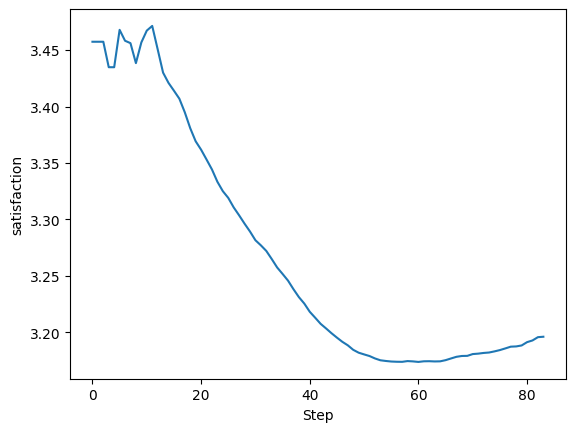

In [21]:
sns.lineplot(agents.reset_index().groupby('Step')['satisfaction'].mean().reset_index(), x='Step', y='satisfaction')

In [22]:
agents['satisfaction'].describe()

count    86131.000000
mean         3.214421
std          0.108550
min          2.939413
25%          3.136976
50%          3.200057
75%          3.274498
max          3.742220
Name: satisfaction, dtype: float64

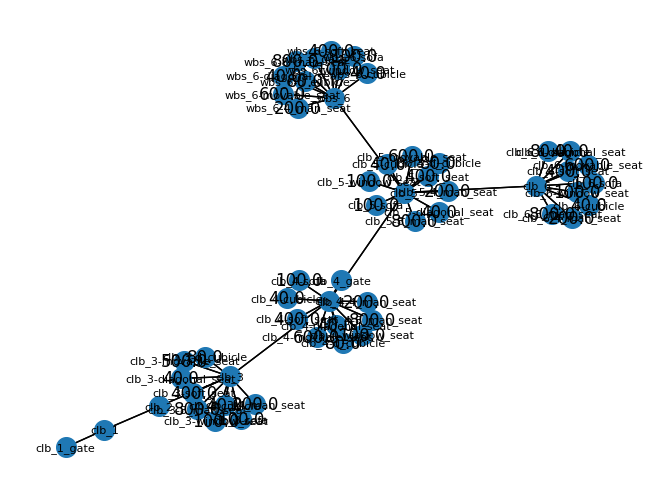

{'clb_3-movable_seat': 500.0,
 'clb_3-4_man_seat': 200.0,
 'clb_3-8_man_seat': 800.0,
 'clb_3-window_seat': 100.0,
 'clb_3-sofa': 100.0,
 'clb_3-soft_seat': 400.0,
 'clb_3-cubicle': 40.0,
 'clb_3-d_cubicle': 80.0,
 'clb_3-diagonal_seat': 40.0,
 'clb_4-movable_seat': 600.0,
 'clb_4-4_man_seat': 200.0,
 'clb_4-8_man_seat': 800.0,
 'clb_4-window_seat': 100.0,
 'clb_4-sofa': 100.0,
 'clb_4-soft_seat': 400.0,
 'clb_4-cubicle': 40.0,
 'clb_4-d_cubicle': 80.0,
 'clb_4-diagonal_seat': 40.0,
 'clb_5-movable_seat': 600.0,
 'clb_5-4_man_seat': 200.0,
 'clb_5-8_man_seat': 800.0,
 'clb_5-window_seat': 100.0,
 'clb_5-sofa': 100.0,
 'clb_5-soft_seat': 400.0,
 'clb_5-cubicle': 40.0,
 'clb_5-d_cubicle': 80.0,
 'clb_5-diagonal_seat': 40.0,
 'clb_6-movable_seat': 600.0,
 'clb_6-4_man_seat': 200.0,
 'clb_6-8_man_seat': 800.0,
 'clb_6-window_seat': 100.0,
 'clb_6-sofa': 100.0,
 'clb_6-soft_seat': 400.0,
 'clb_6-cubicle': 40.0,
 'clb_6-d_cubicle': 80.0,
 'clb_6-diagonal_seat': 40.0,
 'wbs_6-movable_seat': 6

In [23]:
# Create a layout for the nodes
pos = nx.spring_layout(model.library_graph)

# Extract capacities into a dictionary for nodes that have the 'capacity' attribute
capacities = {node: model.library_graph.nodes[node]['capacity'] for node in model.library_graph.nodes if 'capacity' in model.library_graph.nodes[node]}

# Draw the nodes with labels
nx.draw(model.library_graph, pos, with_labels=True, node_size=200, font_size=8)

# Draw the edges
nx.draw_networkx_edges(model.library_graph, pos)

# Label nodes with their capacities
nx.draw_networkx_labels(model.library_graph, pos, labels=capacities)

# Show the graph
plt.show()
capacities